# Démo : clustering hiérarchique

## Importer les données

In [1]:
import pandas as pd

data = pd.read_csv('../data/lung_cancer.csv', sep=';', index_col='id_sample')
print('data', data.shape)

data (150, 53)


Le dataframe importé contient les niveaux d'expression de 50 gènes dans 150 échantillons du poumon. Trois dernières colonnes indiquent le statut de l'échantillon (normal ou tumeur), le dataset d'origine (TCGA-LUAD ou TCGA-LUSC) et la classe (NTL, ADK, SQC). 

- NTL (non tumoral lung) - poumon non tumoral
- ADK (adenocarcinoma) - adénocarcinome du poumon
- SQC (squamous cell carcinoma) - carcinome épidermoïde du poumon

In [2]:
data.head()

,APOC1,MERTK,CMTM3,XPR1,H2BC5,MSMO1,TMEM97,IFFO2,FAM89A,CTSH,...,MELK,MMP12,SOX9,APBA2,NFIB,GRK5,TMEM150B,tissue_status,source,class
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-43-6647-01A,3.692305,2.569732,4.155590,4.094676,2.792685,4.901656,2.290414,4.404727,2.749062,6.560401,...,2.044266,7.120371,4.692437,2.630496,1.996536,1.927014,1.280060,tumoral,TCGA-LUSC,SQC
TCGA-22-4593-01A,2.949213,1.027134,4.030874,2.677671,3.339568,6.229210,5.446595,4.415215,2.714060,2.739495,...,3.737576,2.693306,5.017445,1.988419,4.082883,1.961332,0.320457,tumoral,TCGA-LUSC,SQC
TCGA-92-7341-01A,5.400119,3.897991,3.961812,4.805674,3.608529,6.396105,4.997865,3.701787,4.218262,4.566433,...,3.668505,6.228964,3.631651,2.902791,2.988236,1.996756,0.459460,tumoral,TCGA-LUSC,SQC
TCGA-68-8251-01A,3.774515,2.150148,4.081626,3.183550,1.947876,4.221295,4.161457,2.794275,3.145032,4.488327,...,3.278803,6.731229,4.789792,2.956461,2.591611,1.337750,0.842107,tumoral,TCGA-LUSC,SQC
TCGA-85-8479-01A,2.022175,0.795053,2.062744,3.044048,5.256811,4.986559,2.568166,4.760918,3.918480,5.046272,...,2.593756,1.851387,3.478012,0.346543,0.749769,1.143228,0.171289,tumoral,TCGA-LUSC,SQC


## Extraire les données d’expression et les étiquettes

In [3]:
# Données d'expression de 50 gènes
X = data.select_dtypes('number') 
print('X', X.shape)

X (150, 50)


In [4]:
# Etiquettes des échantillons
y = data['class']
print('y', y.shape, y.unique())

y (150,) ['SQC' 'ADK' 'NTL']


## Appliquer une normalisation centrée-réduite

Une normalisation de données est nécessaire pour ramener les niveaux d'expression de gènes à la même échelle. Pour des raisons pédagogiques, on réalise ici une normalisation centrée-réduite explicitement dans une étape séparée. Il est néanmoins possible de l'intégrer à la dernière étape du pipeline, simplement en option de la méthode `clustermap` de la librairie `seaborn`.  

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled', X_scaled.shape)

X_scaled (150, 50)


## Définir les couleurs pour chaque classe

In [6]:
class_color = {'NTL': 'aquamarine', 'ADK': 'darkslateblue', 'SQC': 'darkorange'}
y_color = [class_color[c] for c in y]

## Réaliser un clustering hiérarchique

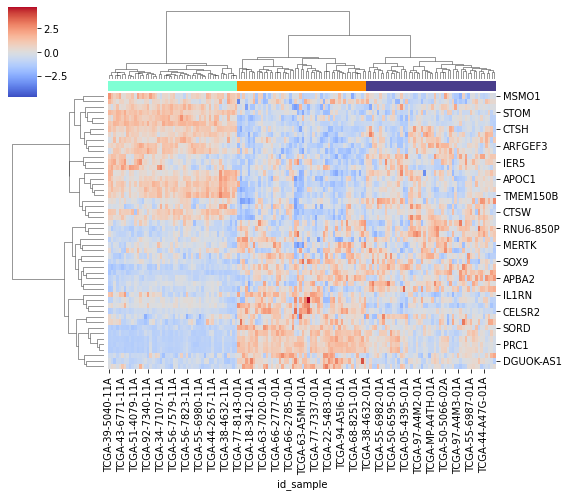

In [7]:
%matplotlib inline
import seaborn as sns

metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(8, 7), metric=metric, method=method, cmap=cmap, 
                             row_cluster=True, col_cluster=True, col_colors=y_color,
                             center=0.0, vmin=-4.8, vmax=4.8)

## Sauvegarder la figure dans un fichier

In [8]:
fig = clustergrid.fig
fig.savefig('../images/hierarchical_clustering.png', dpi=300, format='png', bbox_inches='tight')